# Author: Adish Jain

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.stats import multivariate_normal as mn
from sklearn.preprocessing import normalize
import numpy as np
import pandas as pd
import math
import random
from matplotlib import cm
import save_csv
import itertools

# Question 2

<a list of 7 text.Text objects>

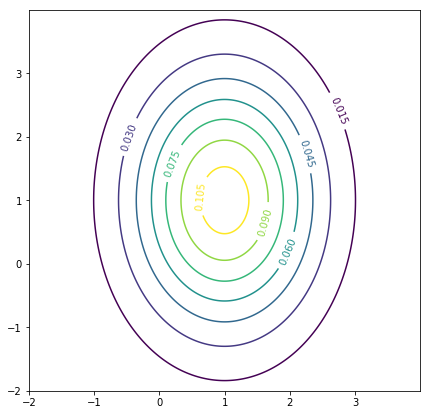

In [2]:
#Question 2: Part A
plt.rcParams["figure.figsize"] = [7,7]
x, y = np.mgrid[-2:4:.01, -2:4:.01]
pos = np.empty(x.shape + (2,))
pos[:, :, 0] = x; pos[:, :, 1] = y
rv = mn([1, 1], [[1, 0], [0, 2]])
fig, ax = plt.subplots()
cx = ax.contour(x, y, rv.pdf(pos))
ax.clabel(cx, inline=1, fontsize=10)

<a list of 6 text.Text objects>

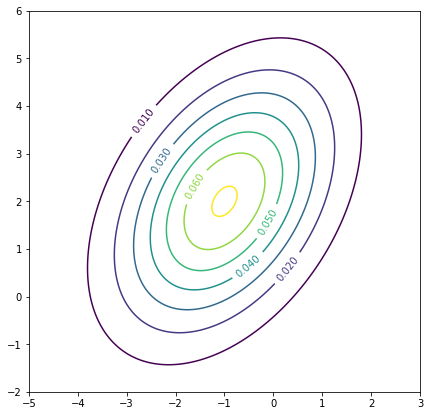

In [3]:
#Question 2: Part B
plt.rcParams["figure.figsize"] = [7,7]
x, y = np.mgrid[-5:3:.01, -2:6:.01]
pos = np.empty(x.shape + (2,))
pos[:, :, 0] = x; pos[:, :, 1] = y
rv = mn([-1, 2], [[2, 1], [1, 3]])
fig, ax = plt.subplots()
cx = ax.contour(x, y, rv.pdf(pos))
ax.clabel(cx, inline=1, fontsize=10)

<a list of 7 text.Text objects>

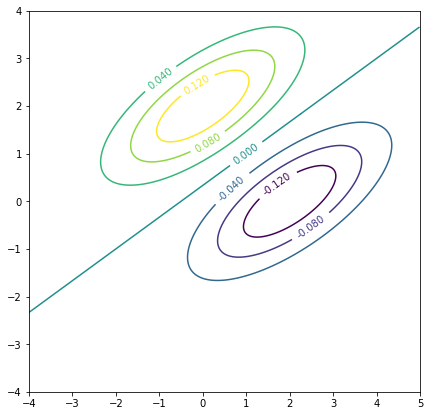

In [4]:
#Question 2: Part C
plt.rcParams["figure.figsize"] = [7,7]
x, y = np.mgrid[-4:5:.01, -4:4:.01]
pos = np.empty(x.shape + (2,))
pos[:, :, 0] = x; pos[:, :, 1] = y
rv1 = mn([0, 2], [[2, 1], [1, 1]])
rv2 = mn([2, 0], [[2, 1], [1, 1]])
fig, ax = plt.subplots()
cx = ax.contour(x, y, rv1.pdf(pos) - rv2.pdf(pos))
ax.clabel(cx, inline=1, fontsize=10)

<a list of 7 text.Text objects>

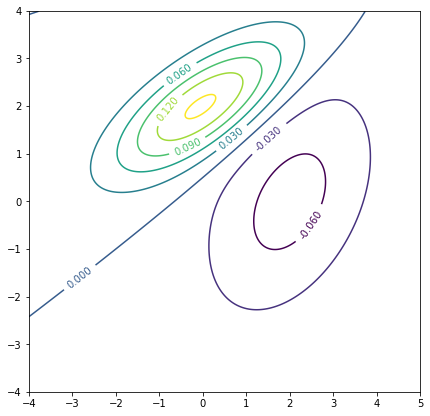

In [5]:
#Question 2: Part D
plt.rcParams["figure.figsize"] = [7,7]
x, y = np.mgrid[-4:5:.01, -4:4:.01]
pos = np.empty(x.shape + (2,))
pos[:, :, 0] = x; pos[:, :, 1] = y
rv1 = mn([0, 2], [[2, 1], [1, 1]])
rv2 = mn([2, 0], [[2, 1], [1, 3]])
fig, ax = plt.subplots()
cx = ax.contour(x, y, rv1.pdf(pos) - rv2.pdf(pos))
ax.clabel(cx, inline=1, fontsize=10)

<a list of 7 text.Text objects>

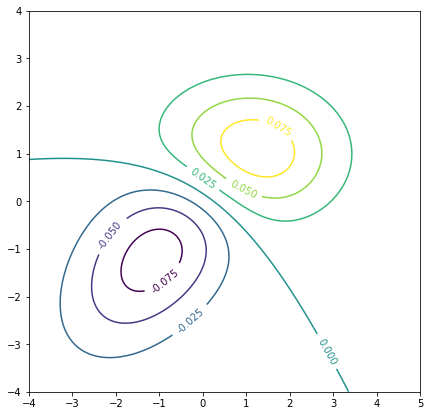

In [6]:
#Question 2: Part E
plt.rcParams["figure.figsize"] = [7,7]
x, y = np.mgrid[-4:5:.01, -4:4:.01]
pos = np.empty(x.shape + (2,))
pos[:, :, 0] = x; pos[:, :, 1] = y
rv1 = mn([1, 1], [[2, 0], [0, 1]])
rv2 = mn([-1, -1], [[2, 1], [1, 2]])
fig, ax = plt.subplots()
cx = ax.contour(x, y, rv1.pdf(pos) - rv2.pdf(pos))
ax.clabel(cx, inline=1, fontsize=10)

# Question 3

In [2]:
np.random.seed(42)

In [3]:
X_one = np.random.normal(3, 9, 100)
X_two = 0.5*X_one + np.random.normal(4, 4, 100)
samples = list(zip(X_one, X_two))
samples[0:5]

[(7.4704273771010943, 2.0737307203488902),
 (1.7556212894593382, 3.1952293536682328),
 (8.8291968429062315, 7.0437403553460376),
 (16.707268707672227, 9.1445252769496381),
 (0.89261962748997625, 3.8011669670809516)]

In [9]:
#Part A
sample_mean = (np.mean(X_one), np.mean(X_two))
sample_mean

(2.0653813434531552, 5.1219090199262736)

In [10]:
#Part B
cov_matrix = np.cov(np.array(samples).T)
cov_matrix

array([[ 66.80636138,  29.14962975],
       [ 29.14962975,  26.99979136]])

In [11]:
#Part C
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
print(eigenvalues)
print(eigenvectors)

[ 82.19955876  11.60659398]
[[ 0.88427615 -0.46696433]
 [ 0.46696433  0.88427615]]


In [12]:
eigenvectors_scaled = np.empty(eigenvectors.shape)
eigenvectors_scaled[:,0] = eigenvectors[:,0] * eigenvalues[0]
eigenvectors_scaled[:,1] = eigenvectors[:,1] * eigenvalues[1]
eigenvectors_scaled

array([[ 72.68710955,  -5.41986539],
       [ 38.38426194,  10.26343427]])

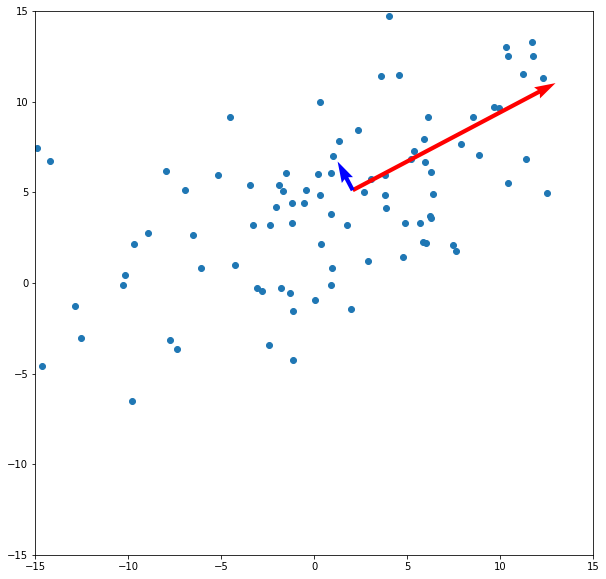

In [13]:
#Part D: FIX MAGNITUDES 
plt.figure(figsize=(10, 10))
plt.xlim(-15, 15)
plt.ylim(-15, 15)
plt.scatter(X_one, X_two)
origin = sample_mean[0], sample_mean[1]
plt.quiver(*origin, eigenvectors_scaled[0], eigenvectors_scaled[1], color = ['r', 'b'], scale=200)

In [14]:
#Part E
U = eigenvectors.T
adjusted_samples = [np.array(i) - np.array(sample_mean) for i in samples]
x_rotated = np.dot(np.array(adjusted_samples), U.T)
x_rotated[0:5]

array([[  3.35616277,  -5.21939508],
       [ -1.17360411,  -1.55906999],
       [  6.87850743,  -1.45903096],
       [ 14.82589013,  -3.28013551],
       [ -1.65378465,  -0.62026281]])

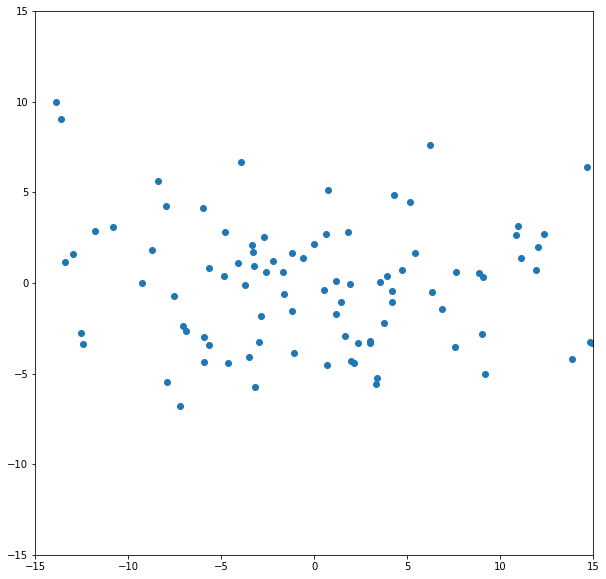

In [15]:
plt.figure(figsize=(10, 10))
plt.xlim(-15, 15)
plt.ylim(-15, 15)
plt.scatter(x_rotated[:, 0], x_rotated[:, 1])

# Question 7

In [4]:
from scipy import io

for data_name in ["mnist", "spam"]:
    data = io.loadmat("%s-data/%s_data.mat" % (data_name, data_name))
    print("\nloaded %s data!" % data_name)
    fields = "test_data", "training_data", "training_labels"
    for field in fields:
        print(field, data[field].shape)
np.random.seed(42)


loaded mnist data!
test_data (10000, 784)
training_data (60000, 784)
training_labels (60000, 1)

loaded spam data!
test_data (5857, 32)
training_data (5172, 32)
training_labels (5172, 1)


In [5]:
mnist_data = io.loadmat("mnist-data/mnist_data.mat")
mnist_training_data = mnist_data["training_data"]
mnist_training_labels = mnist_data["training_labels"]
mnist_test_data = mnist_data["test_data"]

In [6]:
#Part A
mnist = pd.DataFrame(mnist_training_data)
mnist["label"] = mnist_training_labels
class_priors = [list(mnist["label"]).count(i)/len(mnist["label"]) for i in range(10)]
class_means = []
class_covs = []
class_gaussians = []

for i in range(10):
    class_i = mnist[mnist["label"] == i]
    class_i.drop(["label"], axis=1, inplace=True)
    class_i.apply(lambda x: x/np.linalg.norm(x), axis=1)
    class_i_mean = class_i.mean(axis=0)
    class_i_cov = np.cov(class_i, bias=True, rowvar = False) + np.identity(784)*(1**-10)
    class_i_gaussian = mn(class_i_mean, class_i_cov)
    class_means.append(class_i_mean)
    class_covs.append(class_i_cov)
    class_gaussians.append(class_i_gaussian)

/Users/Adish/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()


In [11]:
mnist_training_labels[1]

array([2], dtype=uint8)

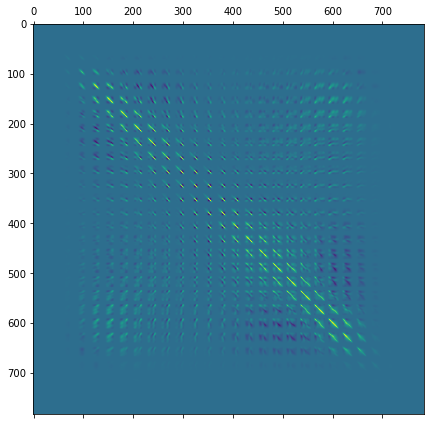

In [19]:
#Part B
plt.matshow(class_covs[2])

Above, I have plotted the covariance matrix for class 2. From this image, we can conclude that the diagonal terms seem much more dense (have greater covariance values) than the off-diagonal terms. 

In [20]:
#Part C: LDA
indices = np.arange(0, 60000)
np.random.shuffle(indices)
val_indices = indices[:10000]
training_indices = indices[10000:]

mnist_val_data = np.array(mnist_data["training_data"])[val_indices]
mnist_val_labels = np.array(mnist_data["training_labels"])[val_indices]

mnist_training_data = np.array(mnist_data["training_data"])[training_indices]
mnist_training_labels = np.array(mnist_data["training_labels"])[training_indices]

num_training_examples = [100, 200, 500, 1000, 2000, 5000, 10000, 30000, 50000] 
training_errors_lda_digit = []
val_errors_lda_digit = []
errors_lda = []

for i in num_training_examples:
    subset_mnist_training_data = mnist_training_data[:i]
    subset_mnist_training_labels = mnist_training_labels[:i]
    subset_mnist_training = pd.DataFrame(subset_mnist_training_data)
    subset_mnist_training["label"] = subset_mnist_training_labels
    subset_class_priors = [list(mnist["label"]).count(i)/len(mnist["label"]) for i in range(10)]
    subset_class_means = []
    subset_class_covs = []
    
    for j in range(10):
        subset_class_j = subset_mnist_training[subset_mnist_training["label"] == j]
        subset_class_j.drop(["label"], axis=1, inplace=True)
        subset_class_j.apply(lambda x: x/np.linalg.norm(x), axis=1)
        subset_class_j_mean = subset_class_j.mean(axis=0)
        subset_class_j_cov = np.cov(subset_class_j, bias=True, rowvar = False) + np.identity(784)*(1**-10)
        subset_class_means.append(subset_class_j_mean)
        subset_class_covs.append(subset_class_j_cov)
    
    subset_avg_cov = np.mean(subset_class_covs, axis=0)
    subset_inv_avg_cov = np.linalg.inv(subset_avg_cov)
    
    training_predicted_labels = []
    for x in subset_mnist_training_data:
        ld_functions = []
        for k in range(10):
            ld_func = np.dot(np.dot(subset_class_means[k].T, subset_inv_avg_cov), x) - 0.5*np.dot(np.dot(subset_class_means[k].T, subset_inv_avg_cov), subset_class_means[k]) + np.log(subset_class_priors[k])
            ld_functions.append(ld_func)
          
        training_predicted_labels.append(np.argmax(ld_functions))
    
    training_errors_lda_digit.append([np.count_nonzero((np.array(training_predicted_labels)[list(itertools.chain(*subset_mnist_training_labels == [m]))] != m))/np.count_nonzero(list(itertools.chain(*subset_mnist_training_labels == [m]))) for m in range(10)])
              
                                     
    val_predicted_labels = []
    for x in mnist_val_data:
        ld_functions = []
        for k in range(10):
            ld_func = np.dot(np.dot(subset_class_means[k].T, subset_inv_avg_cov), x) - 0.5*np.dot(np.dot(subset_class_means[k].T, subset_inv_avg_cov), subset_class_means[k]) + np.log(subset_class_priors[k])
            ld_functions.append(ld_func)
          
        val_predicted_labels.append(np.argmax(ld_functions))
    
    val_errors_lda_digit.append([np.count_nonzero((np.array(val_predicted_labels)[list(itertools.chain(*mnist_val_labels == [m]))] != m))/np.count_nonzero(list(itertools.chain(*mnist_val_labels == [m]))) for m in range(10)])
    
    errors_lda.append(np.count_nonzero([val_predicted_labels[i] != mnist_val_labels[i][0] for i in range(len(mnist_val_labels))])/len(mnist_val_labels))
    

/Users/Adish/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [21]:
class_training_errors_lda = [] 
class_validation_errors_lda = []
for i in range(10):
    class_training = []
    class_validation = []
    for j in range(9):
        class_training.append(training_errors_lda_digit[j][i])
        class_validation.append(val_errors_lda_digit[j][i])
    class_training_errors_lda.append(class_training)
    class_validation_errors_lda.append(class_validation)

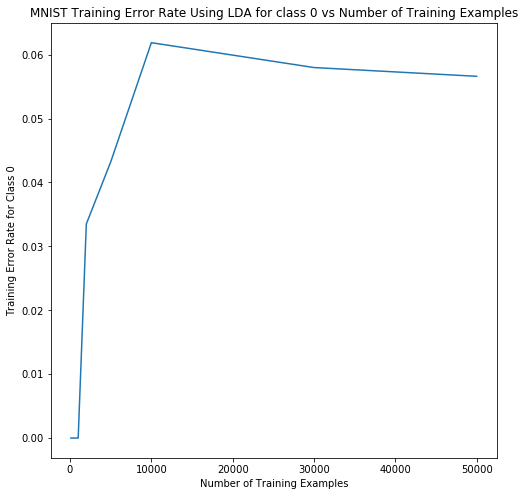

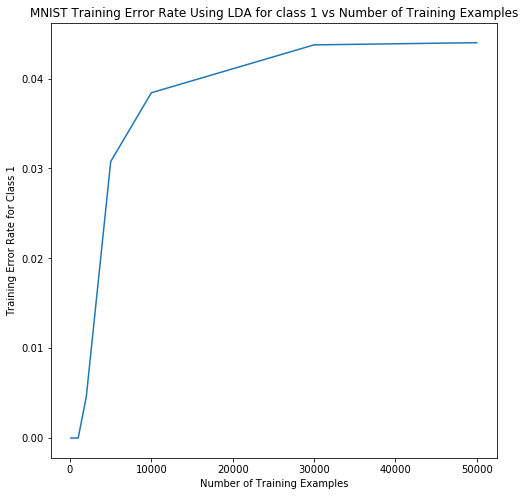

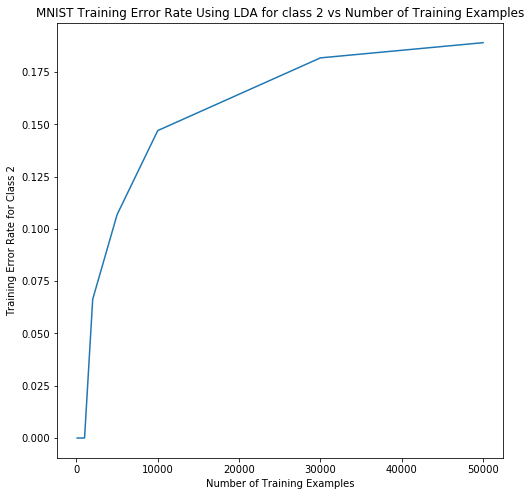

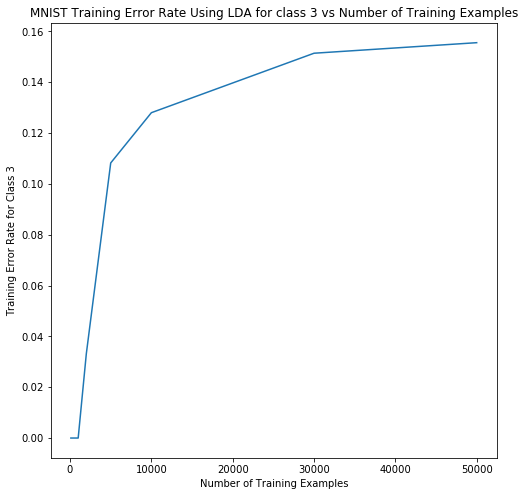

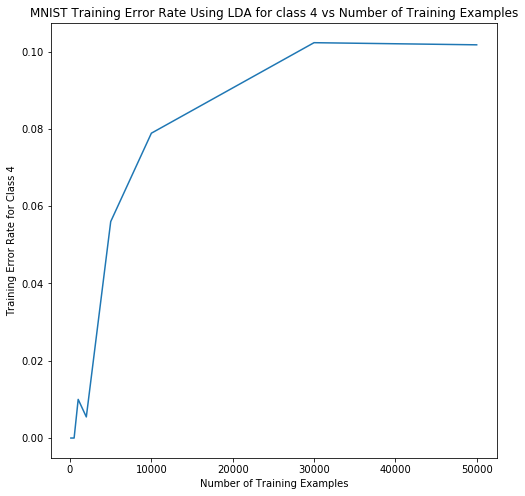

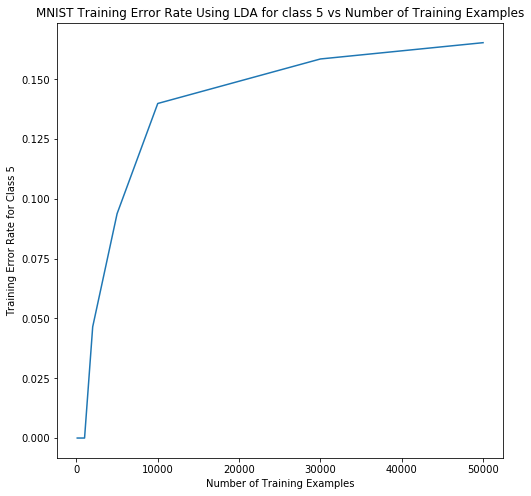

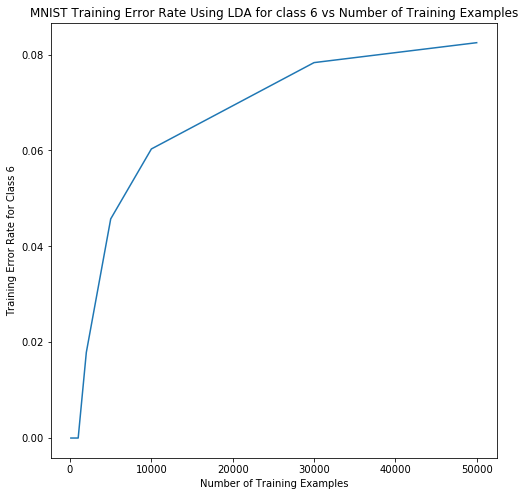

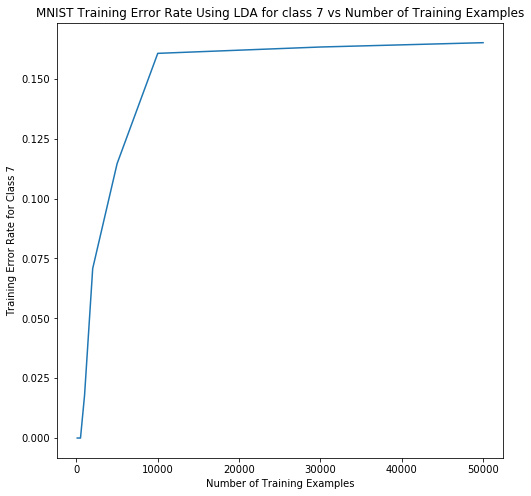

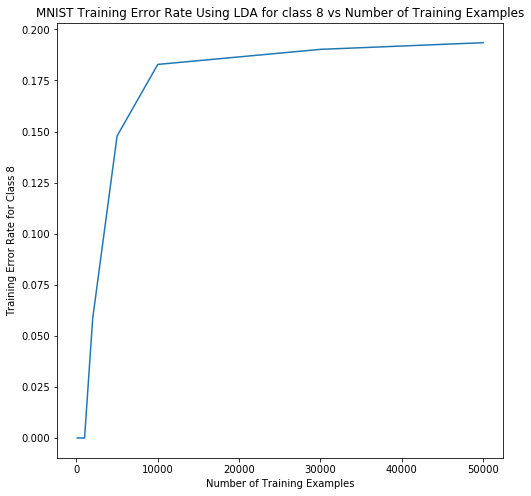

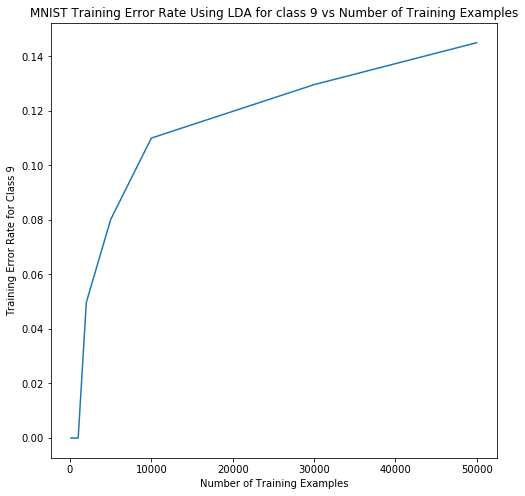

In [29]:
for i in range(10):
    plt.figure(figsize=(8, 8))
    plt.title("MNIST Training Error Rate Using LDA for class %s vs Number of Training Examples" % i)
    plt.xlabel("Number of Training Examples")
    plt.ylabel("Training Error Rate for Class %s" % i)
    plt.plot(num_training_examples, class_training_errors_lda[i])

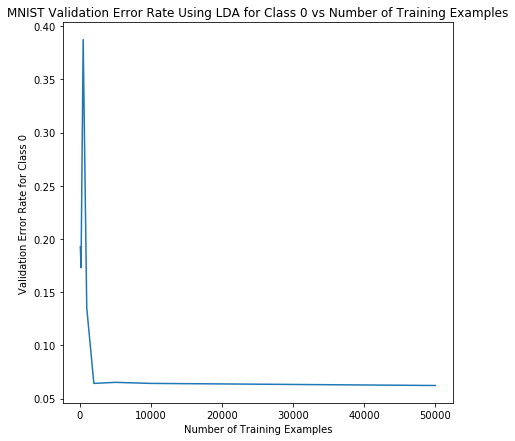

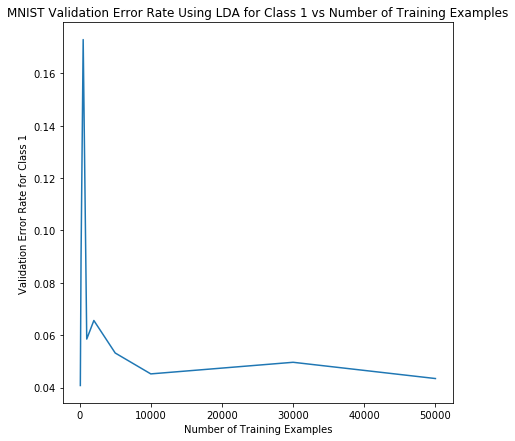

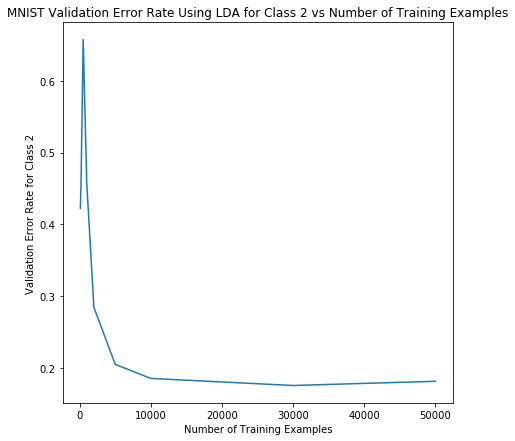

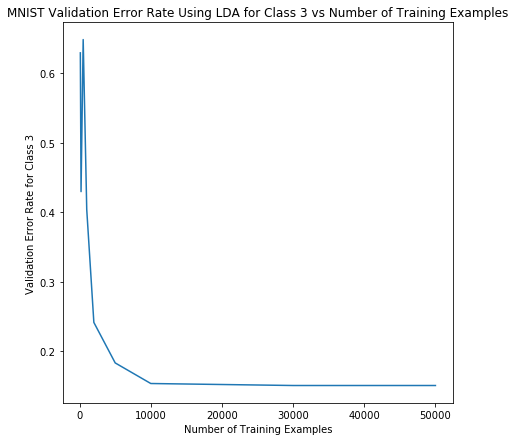

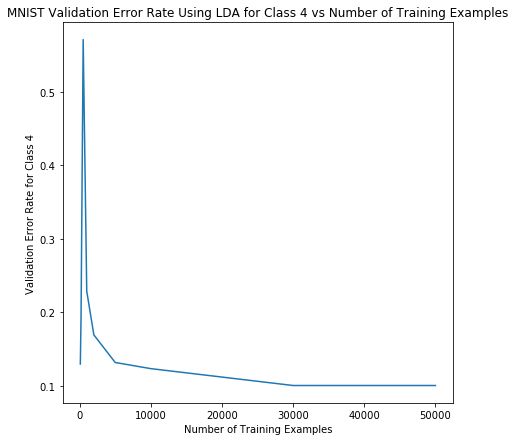

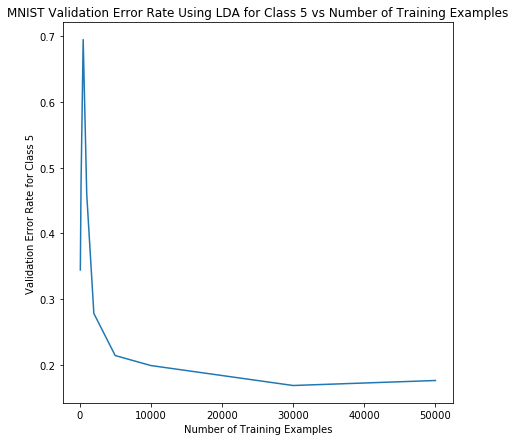

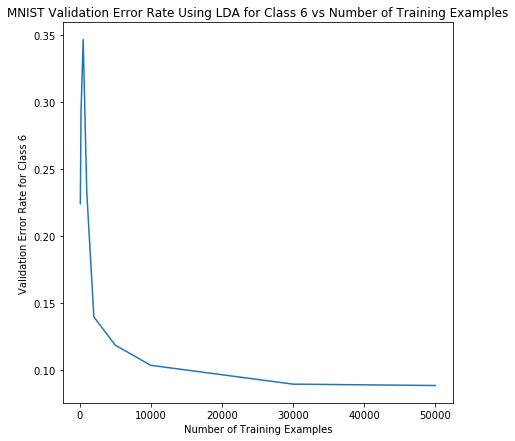

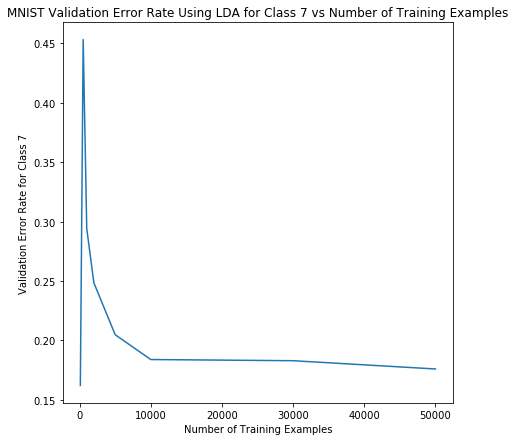

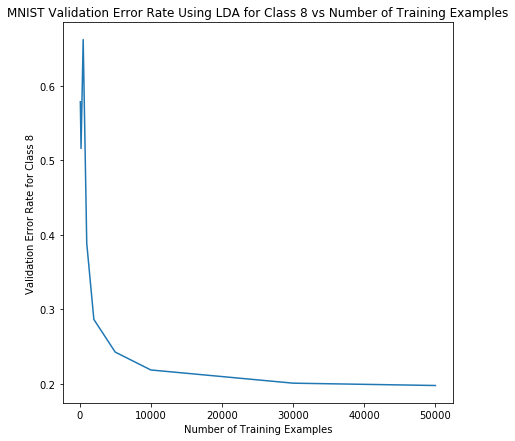

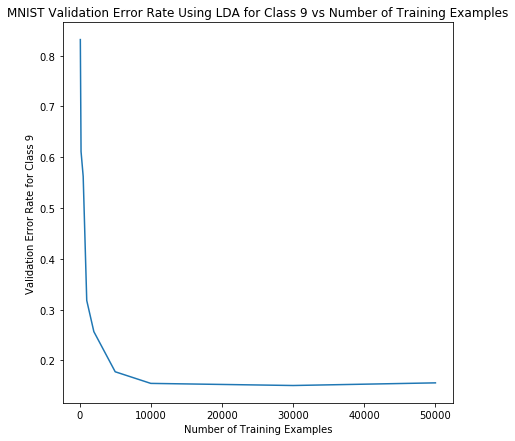

In [30]:
for i in range(10):
    plt.figure(figsize=(7, 7))
    plt.title("MNIST Validation Error Rate Using LDA for Class %s vs Number of Training Examples" % i)
    plt.xlabel("Number of Training Examples")
    plt.ylabel("Validation Error Rate for Class %s" % i)
    plt.plot(num_training_examples, class_validation_errors_lda[i])

In [24]:
errors_lda

[0.3509, 0.342, 0.5096, 0.2938, 0.2008, 0.1575, 0.1411, 0.1316, 0.1315]

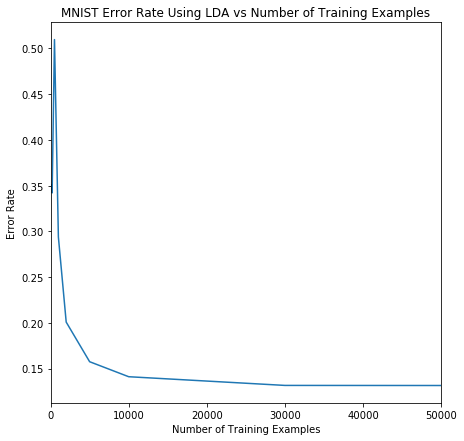

In [27]:
plt.plot(num_training_examples, errors_lda)
plt.xlim(0, 50000)
plt.title("MNIST Error Rate Using LDA vs Number of Training Examples")
plt.xlabel("Number of Training Examples")
plt.ylabel("Error Rate");

In [28]:
#Part C: QDA
errors_qda = []
training_errors_qda_digit = []
val_errors_qda_digit = []

for i in num_training_examples:
    subset_mnist_training_data = mnist_training_data[:i]
    subset_mnist_training_labels = mnist_training_labels[:i]
    subset_mnist_training = pd.DataFrame(subset_mnist_training_data)
    subset_mnist_training["label"] = subset_mnist_training_labels
    subset_class_priors = [list(mnist["label"]).count(i)/len(mnist["label"]) for i in range(10)]
    subset_class_means = []
    subset_class_covs = []
    
    for j in range(10):
        subset_class_j = subset_mnist_training[subset_mnist_training["label"] == j]
        subset_class_j.drop(["label"], axis=1, inplace=True)
        subset_class_j.apply(lambda x: x/np.linalg.norm(x), axis=1)
        subset_class_j_mean = subset_class_j.mean(axis=0)
        subset_class_j_cov = np.cov(subset_class_j, bias=True, rowvar = False) + np.identity(784)*(1**-10)
        subset_class_means.append(subset_class_j_mean)
        subset_class_covs.append(subset_class_j_cov)
    
    determinants = []
    inverses = []
    for k in range(10):
        determinants.append(np.linalg.slogdet(subset_class_covs[k])[1])
        inverses.append(np.linalg.inv(subset_class_covs[k]))
        
    training_predicted_labels = []
    for x in subset_mnist_training_data:
        qd_functions = []
        for k in range(10):
            qd_func = -0.5*np.dot(np.dot((x - subset_class_means[k]).T, inverses[k]), (x - subset_class_means[k])) - 0.5*(np.log(determinants[k])) + np.log(subset_class_priors[k])
            qd_functions.append(qd_func)
          
        training_predicted_labels.append(np.argmax(qd_functions))
    
    training_errors_qda_digit.append([np.count_nonzero((np.array(training_predicted_labels)[list(itertools.chain(*subset_mnist_training_labels == [m]))] != m))/np.count_nonzero(list(itertools.chain(*subset_mnist_training_labels == [m]))) for m in range(10)])
        
    
    val_predicted_labels = []
    for x in mnist_val_data:
        qd_functions = []
        for k in range(10):
            qd_func = -0.5*np.dot(np.dot((x - subset_class_means[k]).T, inverses[k]), (x - subset_class_means[k])) - 0.5*(np.log(determinants[k])) + np.log(subset_class_priors[k])
            qd_functions.append(qd_func)
          
        val_predicted_labels.append(np.argmax(qd_functions))
        
    val_errors_qda_digit.append([np.count_nonzero((np.array(val_predicted_labels)[list(itertools.chain(*mnist_val_labels == [m]))] != m))/np.count_nonzero(list(itertools.chain(*mnist_val_labels == [m]))) for m in range(10)])
    
    errors_qda.append(np.count_nonzero([val_predicted_labels[i] != mnist_val_labels[i][0] for i in range(len(mnist_val_labels))])/len(mnist_val_labels))
    

/Users/Adish/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [31]:
class_training_errors_qda = [] 
class_validation_errors_qda = []
for i in range(10):
    class_training = []
    class_validation = []
    for j in range(9):
        class_training.append(training_errors_qda_digit[j][i])
        class_validation.append(val_errors_qda_digit[j][i])
    class_training_errors_qda.append(class_training)
    class_validation_errors_qda.append(class_validation)

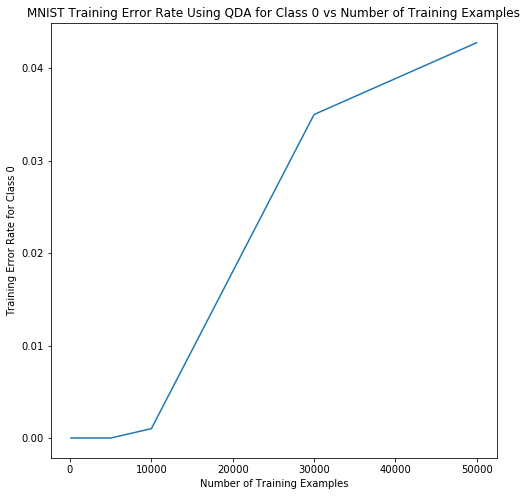

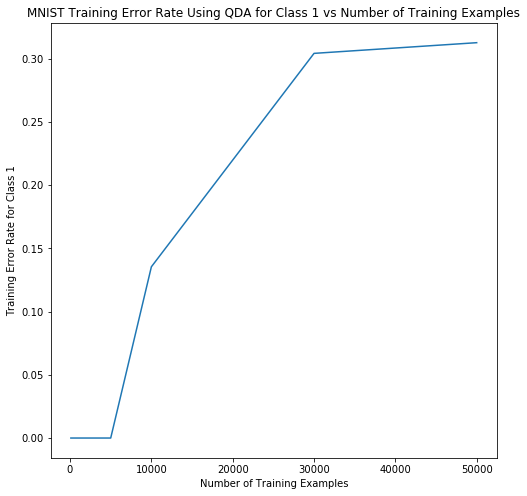

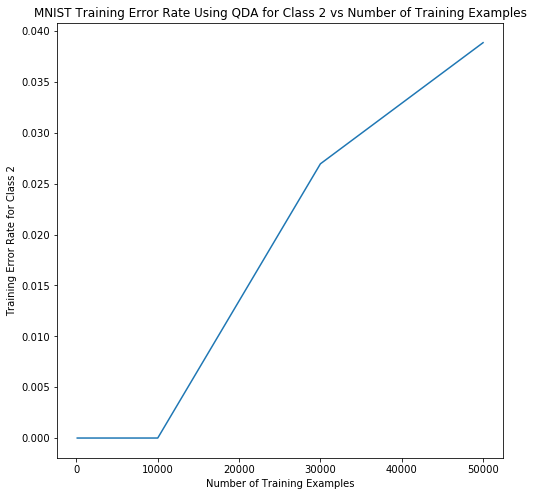

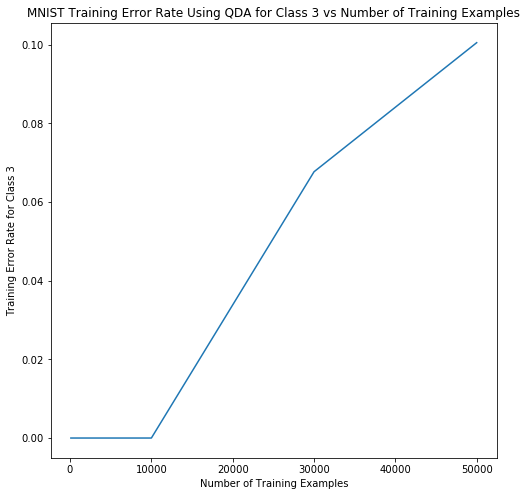

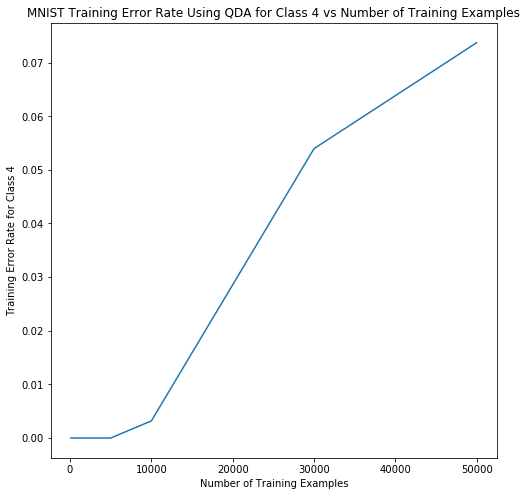

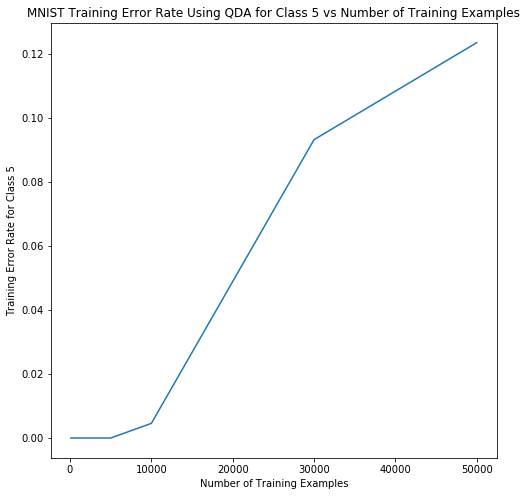

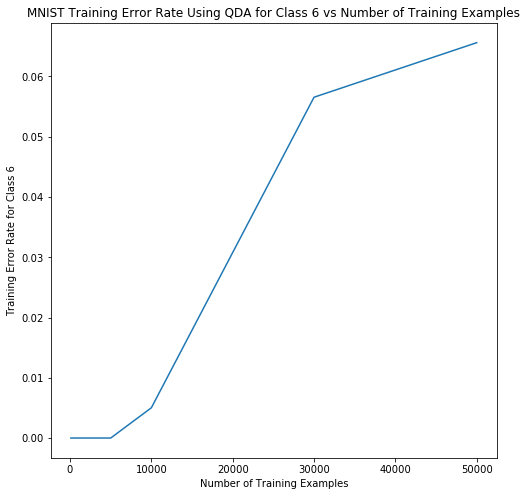

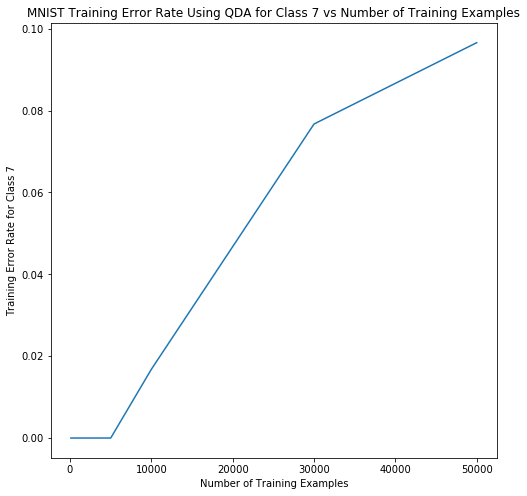

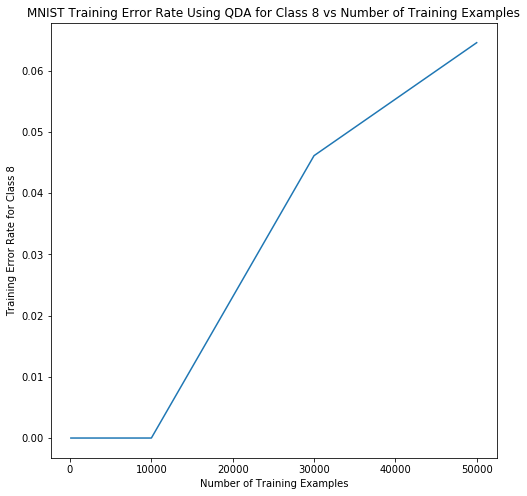

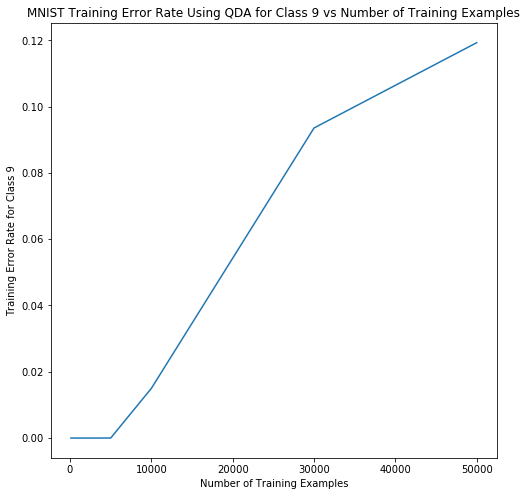

In [32]:
for i in range(10):
    plt.figure(figsize=(8, 8))
    plt.title("MNIST Training Error Rate Using QDA for Class %s vs Number of Training Examples" % i)
    plt.xlabel("Number of Training Examples")
    plt.ylabel("Training Error Rate for Class %s" % i)
    plt.plot(num_training_examples, class_training_errors_qda[i])

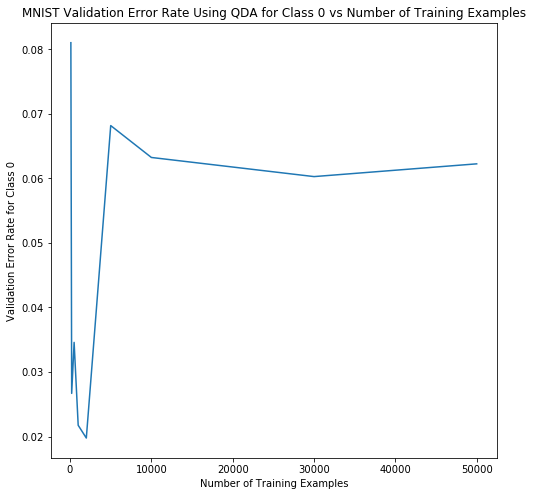

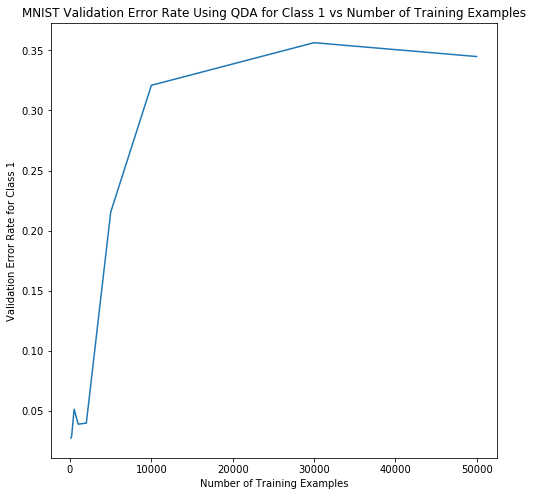

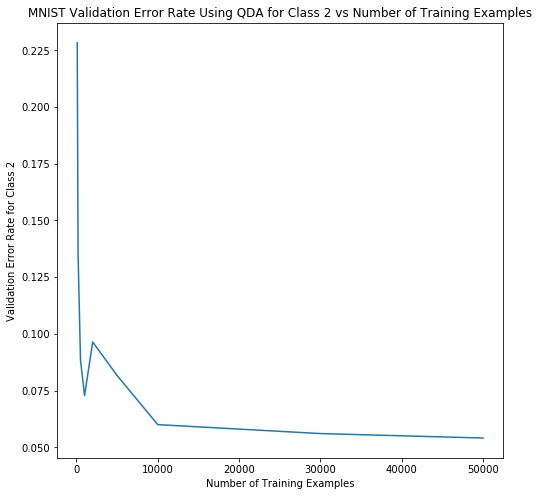

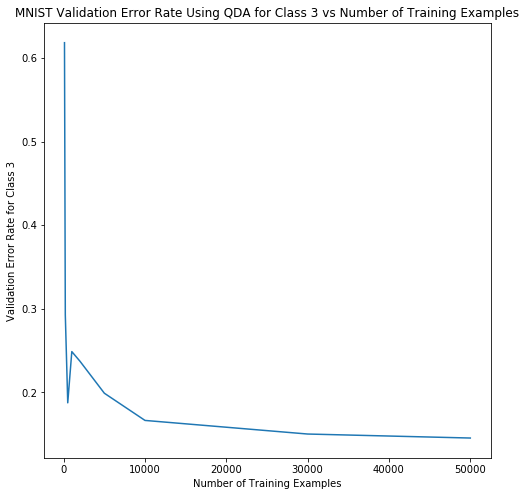

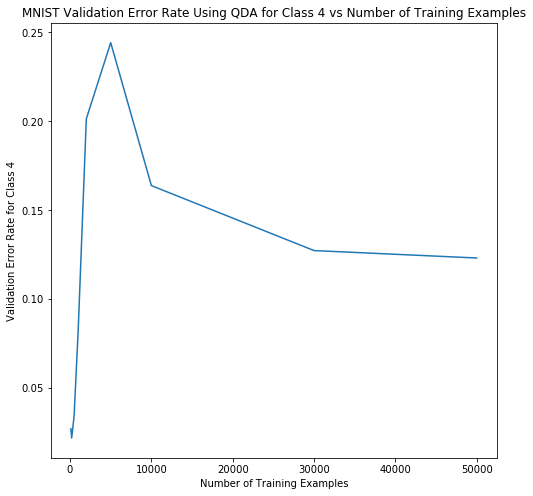

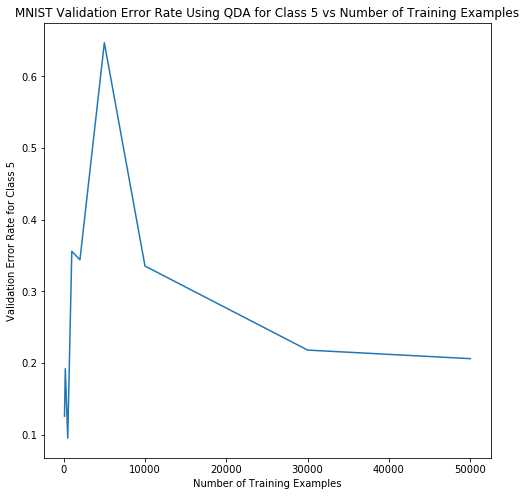

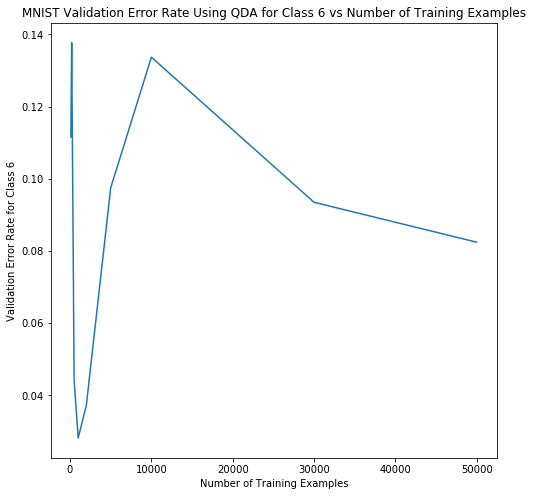

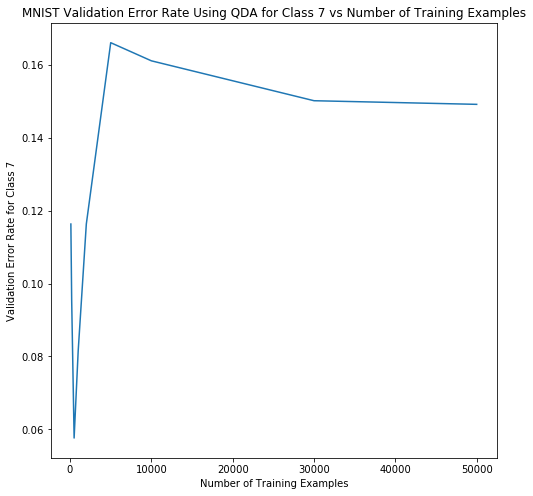

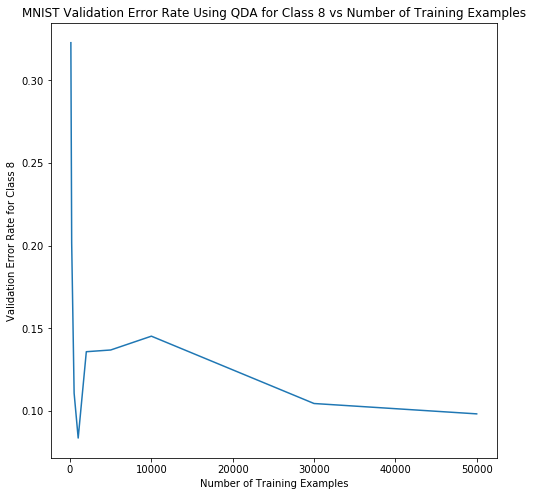

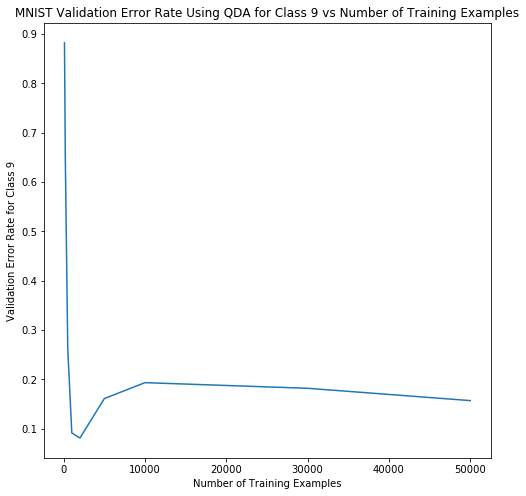

In [33]:
for i in range(10):
    plt.figure(figsize=(8, 8))
    plt.title("MNIST Validation Error Rate Using QDA for Class %s vs Number of Training Examples" % i)
    plt.xlabel("Number of Training Examples")
    plt.ylabel("Validation Error Rate for Class %s" % i)
    plt.plot(num_training_examples, class_validation_errors_qda[i])

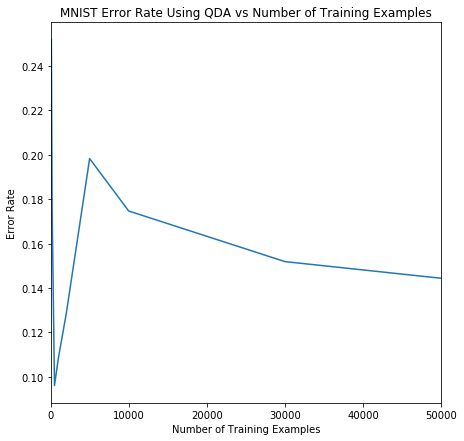

In [34]:
plt.plot(num_training_examples, errors_qda)
plt.xlim(0, 50000)
plt.title("MNIST Error Rate Using QDA vs Number of Training Examples")
plt.xlabel("Number of Training Examples")
plt.ylabel("Error Rate");

In [35]:
errors_qda

[0.2519, 0.1754, 0.0961, 0.1085, 0.1283, 0.1983, 0.1747, 0.1519, 0.1444]

Part C (3): Considering only the case where we trained with 50,000 training examples for each, as this would provide more realistic insight as to which classifier performs better, it seems as though the LDA classifier outperforms the QDA classifier by just a little. With 50,000 training points, the LDA classifier achieves an error rate of 0.1315, compared to the QDA's 0.1444. 

In [ ]:
#Part C: (4)
mnist_training_data = pd.DataFrame(mnist_data["training_data"])
mnist_training_labels = mnist_data["training_labels"]
mnist_training_data["label"] = mnist_training_labels
class_priors = [list(mnist_training_data["label"]).count(i)/len(mnist_training_data["label"]) for i in range(10)]
class_means = []
class_covs = []
    
for j in range(10):
    class_j = mnist_training_data[mnist_training_data["label"] == j]
    class_j.drop(["label"], axis=1, inplace=True)
    class_j.apply(lambda x: x/np.linalg.norm(x), axis=1)
    class_j_mean = class_j.mean(axis=0)
    class_j_cov = np.cov(class_j, bias=True, rowvar = False) + np.identity(784)*(1**-10)
    class_means.append(class_j_mean)
    class_covs.append(class_j_cov)
    
avg_cov = np.mean(class_covs, axis=0)
inv_avg_cov = np.linalg.inv(avg_cov)
    
predicted_test_labels = []
for x in mnist_test_data:
    ld_functions = []
    for k in range(10):
        ld_func = np.dot(np.dot(class_means[k].T, inv_avg_cov), x) - 0.5*np.dot(np.dot(class_means[k].T, inv_avg_cov), class_means[k]) + np.log(class_priors[k])
        ld_functions.append(ld_func)
          
    predicted_test_labels.append(np.argmax(ld_functions))  

In [ ]:
np.array(predicted_test_labels)

In [ ]:
save_csv.results_to_csv(np.array(predicted_test_labels))

In [ ]:
#Part D: LDA submission
spam_data = io.loadmat("spam-data/spam_data.mat")
spam_training_data = pd.DataFrame(spam_data["training_data"])
spam_training_labels = spam_data["training_labels"]
spam_training_data["label"] = spam_training_labels
spam_test_data = spam_data["test_data"]
class_priors = [list(spam_training_data["label"]).count(i)/len(spam_training_data["label"]) for i in range(2)]
class_means = []
class_covs = []
    
for j in range(2):
    class_j = spam_training_data[spam_training_data["label"] == j]
    class_j.drop(["label"], axis=1, inplace=True)
    class_j_mean = class_j.mean(axis=0)
    class_j_cov = np.cov(class_j, bias=True, rowvar = False) + np.identity(32)*(1**-10)
    class_means.append(class_j_mean)
    class_covs.append(class_j_cov)
    
avg_cov = np.mean(class_covs, axis=0)
inv_avg_cov = np.linalg.inv(avg_cov)
    
spam_predicted_test_labels = []
for x in spam_test_data:
    ld_functions = []
    for k in range(2):
        ld_func = np.dot(np.dot(class_means[k].T, inv_avg_cov), x) - 0.5*np.dot(np.dot(class_means[k].T, inv_avg_cov), class_means[k]) + np.log(class_priors[k])
        ld_functions.append(ld_func)
          
    spam_predicted_test_labels.append(np.argmax(ld_functions)) 

In [ ]:
save_csv.results_to_csv(np.array(spam_predicted_test_labels))

In [ ]:
#Part D: QDA submission
spam_data = io.loadmat("spam-data/spam_data.mat")
spam_training_data = pd.DataFrame(spam_data["training_data"])
spam_training_labels = spam_data["training_labels"]
spam_training_data["label"] = spam_training_labels
spam_test_data = spam_data["test_data"]
class_priors = [list(spam_training_data["label"]).count(i)/len(spam_training_data["label"]) for i in range(2)]
class_means = []
class_covs = []
    
for j in range(2):
    class_j = spam_training_data[spam_training_data["label"] == j]
    class_j.drop(["label"], axis=1, inplace=True)
    class_j_mean = class_j.mean(axis=0)
    class_j_cov = np.cov(class_j, bias=True, rowvar = False) + np.identity(32)*(1**-10)
    class_means.append(class_j_mean)
    class_covs.append(class_j_cov)
    
determinants = []
inverses = []
for k in range(2):
    determinants.append(np.linalg.slogdet(class_covs[k])[1])
    inverses.append(np.linalg.inv(class_covs[k]))
    
spam_predicted_test_labels_qda = []
for x in spam_test_data:
    qd_functions = []
    for k in range(2):
        qd_func = -0.5*np.dot(np.dot((x - class_means[k]).T, inverses[k]), (x - class_means[k])) - 0.5*(np.log(determinants[k])) + np.log(class_priors[k])
        qd_functions.append(qd_func)
          
    spam_predicted_test_labels_qda.append(np.argmax(qd_functions)) 

In [ ]:
save_csv.results_to_csv(np.array(spam_predicted_test_labels_qda))